In [45]:
%matplotlib inline
import cv2
import matplotlib
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np

In [46]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('C:\\Users\\Cristhian\\TEETH-RECOGNITION-WITH-MACHINE-LEARNING\\DATASET-Recortado') if isfile(join('C:\\Users\\Cristhian\\TEETH-RECOGNITION-WITH-MACHINE-LEARNING\\DATASET-Recortado', f))]

In [ ]:
matplotlib.rcParams.update({'font.size': 16})
def show_hsv_hist(image):
    # Hue
    plt.figure(figsize=(20, 3))
    histr = cv2.calcHist([image], [0], None, [180], [0, 180])
    plt.xlim([0, 180])
    colours = [colors.hsv_to_rgb((i/180, 1, 0.9)) for i in range(0, 180)]
    colours=np.array(colours)
    histr=np.array(histr)
    #print(range(0,180))
    x= list(range(0,180))
    print(histr.shape)
    print(len(x))
    print(colours.shape)
    for i in (x):
        plt.bar(x[i], histr[i], color=colours[i], edgecolor=colours[i], width=1)
        plt.title('Hue')

    # Saturation
    plt.figure(figsize=(20, 3))
    histr = cv2.calcHist([image], [1], None, [256], [0, 256])
    plt.xlim([0, 256])
    x= list(range(0,256))
    colours = [colors.hsv_to_rgb((0, i/256, 1)) for i in range(0, 256)]
    for i in (x):
        plt.bar(x[i], histr[i], color=colours[i], edgecolor=colours[i], width=1)
        #plt.bar(range(0, 256), histr, color=colours, edgecolor=colours, width=1)
        plt.title('Saturation')

    # Value
    plt.figure(figsize=(20, 3))
    histr = cv2.calcHist([image], [2], None, [256], [0, 256])
    plt.xlim([0, 256])
    x=list(range(0,256))
    colours = [colors.hsv_to_rgb((0, 1, i/256)) for i in range(0, 256)]
    for i in (x):
        plt.bar(x[i], histr[i], color=colours[i], edgecolor=colours[i], width=1)
        #plt.bar(range(0, 256), histr, color=colours, edgecolor=colours, width=1)
        plt.title('Value')
show_hsv_hist(hsv)

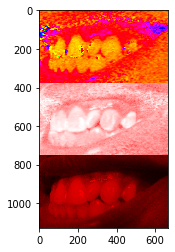

In [51]:
for f in onlyfiles:
    image = cv2.imread('C:\\Users\\Cristhian\\TEETH-RECOGNITION-WITH-MACHINE-LEARNING\\DATASET-Recortado\\'+f)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,None,fx=1/3,fy=1/3)
    # Convert from RGB to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    images = []
    for i in [0, 1, 2]:
        colour = hsv.copy()
        if i != 0: colour[:,:,0] = 0
        if i != 1: colour[:,:,1] = 255
        if i != 2: colour[:,:,2] = 255
        images.append(colour)

    hsv_stack = np.vstack(images)
    rgb_stack = cv2.cvtColor(hsv_stack, cv2.COLOR_HSV2RGB)
    plt.imshow(rgb_stack)
    cv2.imwrite("C:\\Users\\Cristhian\\TEETH-RECOGNITION-WITH-MACHINE-LEARNING\\Images_HSV\\"+f,hsv_stack)
    

In [38]:

#plt.imshow("",image)

In [39]:
thresh2 = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
#plt.imshow(cv2.cvtColor("",thresh2))

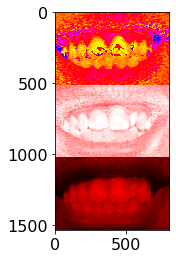

(180, 1)
180
(180, 3)


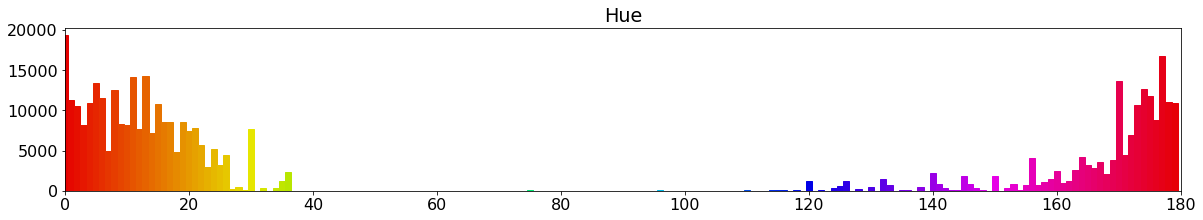

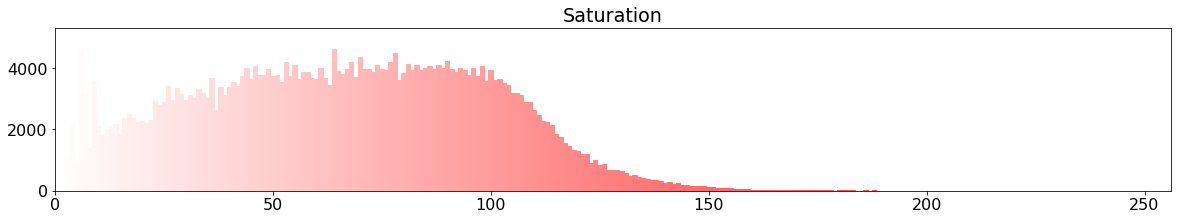

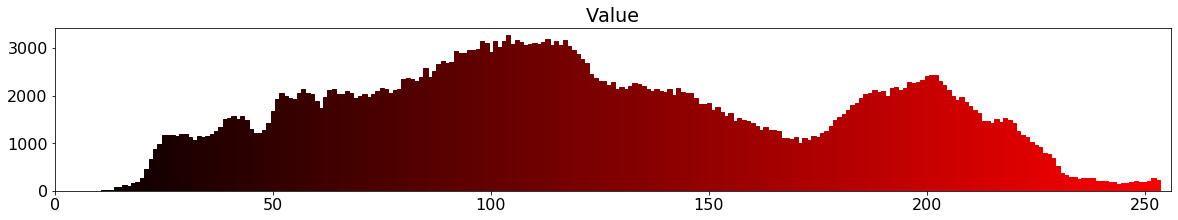

In [42]:
# Blur image slightly
image_blur = cv2.GaussianBlur(image, (7, 7), 0)
image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)
min_red = np.array([15, 50, 225])
max_red = np.array([20, 100, 256])
image_red1 = cv2.inRange(image_blur_hsv, min_red, max_red)

In [43]:
def show_mask(mask):
    plt.figure(figsize=(10, 10))
    plt.imshow(mask, cmap='gray')

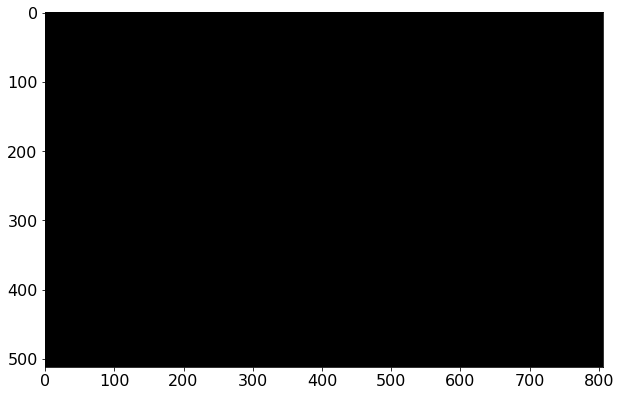

In [44]:
show_mask(image_red1)

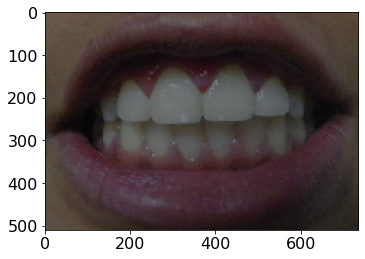

In [37]:
def overlay_mask(mask, image):
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
    plt.imshow(img)

overlay_mask(image_red1, image)